# Tutorial to run HOD models
Should work under cosmodesi 2025_03 environment 

In [1]:
from HODDIES import HOD

# Using abacus simulation at NERSC

In [2]:
# Initiate the HOD instance with default parameter file default_HOD_parameters.yaml

HOD_obj= HOD(tracers=['LRG', 'ELG'], path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')



Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...
Done took 00:00:29
Compute columns...
Done took  00:00:03
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:33
Initialize Abacus c000 cosmology


In [3]:
HOD_obj.hcat

Catalog(csize=48548940, size=48548940, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])

## - Different ways to give input parameters

If you want to use a custom parameter file:


```js
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
``` 
<br> 

You can pass a dictionnary :

```js
args = {'''pass any parameters with the same structure as the default yaml parameter file'''}
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
```

You can also overwrite parameters if you provide **kwargs dict

```js
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
or
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
```

<br> 

## - Different ways to load halo catalogs 

Catalog types supported: `np.ndarray, mpytools.Catalog, dict`

Halo catalogs must contain at least these colunms: `['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id']`

Initialize the instance with a preloaded halo_catalog:

```js
HOD_obj= HOD(hcat_file=halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```

You can also pass the path of the halo catalog. Supported format are: `fits, h5, asdf`

```js
path_to_halo_catalog = '/path/to/halo_catalog'
HOD_obj= HOD(hcat_file=path_to_halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```


In [5]:
# All parameters from the parameter file are set here
HOD_obj.args

{'tracers': ['LRG', 'ELG'],
 'hcat': {'boxsize': None,
  'path_to_sim': None,
  'path_to_part': None,
  'mass_cut': None,
  'z_simu': 0.95,
  'Abacus': {'sim_name': 'AbacusSummit_highbase_c000_ph100',
   'load_particles': False,
   'halo_lc': False,
   'z_simu': 0.95},
  'Pinnochio': {'dir_sim': None},
  'sim_name': 'AbacusSummit_highbase_c000_ph100',
  'load_particles': False,
  'halo_lc': False},
 '2PCF_settings': {'rsd': True,
  'bin_logscale': True,
  'mu_max': 1,
  'n_mu_bins': 101,
  'multipole_index': [0, 2],
  'n_r_bins': 25,
  'n_rp_bins': 25,
  'rmax': 30,
  'rmin': 0.01,
  'rp_max': 30,
  'rp_min': 0.01,
  'edges_rppi': None,
  'edges_smu': None,
  'los': 'z',
  'pimax': 40},
 'cosmo': {'fiducial_cosmo': None,
  'engine': 'class',
  'h': None,
  'Omega_m': None,
  'Omega_cdm': None,
  'Omega_L': None,
  'Omega_b': None,
  'sigma_8': None,
  'n_s': None,
  'w0_fdl': None,
  'wa_fdl': None},
 'seed': None,
 'nthreads': 32,
 'cm_relation': 'diemer19',
 'mass_def': '200c',
 'ass

# Using a custom halo catalog

In [6]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')
print('Satelitte HOD model is the standard power law')

Tracers considered ['LRG', 'ELG']
HOD model for LRG: SHOD
HOD model for ELG: mHMQ
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [7]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'HOD_model': 'SHOD', 'Ac': 1, 'log_Mcent': 12.75, 'sigma_M': 0.5, 'gamma': 1, 'pmax': 1, 'Q': 100, 'satellites': True, 'sat_HOD_model': 'Nsat_pow_law', 'As': 1, 'M_0': 12.5, 'M_1': 13.5, 'alpha': 1, 'f_sigv': 1, 'vel_sat': 'rd_normal', 'v_infall': 0, 'assembly_bias': {'c': [0, 0], 'env': [0, 0]}, 'conformity_bias': False, 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'density': 0.0007, 'vsmear': 0}
{'HOD_model': 'mHMQ', 'Ac': 0.05, 'log_Mcent': 11.63, 'sigma_M': 0.12, 'gamma': 2, 'pmax': 1, 'Q': 100, 'satellites': True, 'sat_HOD_model': 'Nsat_pow_law', 'As': 0.11, 'M_0': 11.63, 'M_1': 11.7, 'alpha': 0.6, 'f_sigv': 1, 'vel_sat': 'rd_normal', 'v_infall': 0, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'density': 0.001, 'vsmear': 0}


In [ ]:
# Create galaxy mock catalog, first evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 11.664838790893555
Start satellite assignement


/global/u1/a/arocher/Code/postdoc/HOD/Dev/HODDIES/HODDIES/utils.py:500: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../HODDIES/utils.py", line 416:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 488:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, v

Satellite assignement done 5.266849994659424
LRG mock catalogue done 5.368981122970581
562602 central galaxies, 136853 satellites, fraction of satellite 0.20 
Done overall time  LRG 17.534041166305542
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 11.192730903625488
Start satellite assignement
Satellite assignement done 0.5369129180908203
ELG mock catalogue done 0.6889166831970215
393698 central galaxies, 604639 satellites, fraction of satellite 0.61 
Done overall time  ELG 24.08639621734619


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 488:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.4519631862640381
Start satellite assignement
Satellite assignement done 0.467517614364624
ELG mock catalogue done 0.6099529266357422
394630 central galaxies, 605366 satellites, fraction of satellite 0.61 
Done overall time  ELG 1.5840389728546143


(Catalog(csize=1697792, size=1697792, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 Catalog(csize=999996, size=999996, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']))

In [9]:
# By default the code automatically fix the density
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg.size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nofixdens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nofixdens.size)


Density fixed to  0.001 ELG catalogue size: 998535
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.3475005626678467
Start satellite assignement
Satellite assignement done 0.861572265625
ELG mock catalogue done 1.1414687633514404
835205 central galaxies, 1284269 satellites, fraction of satellite 0.61 
Done overall time  ELG 2.073641777038574
ELG catalogue size without density constrain: 2119474


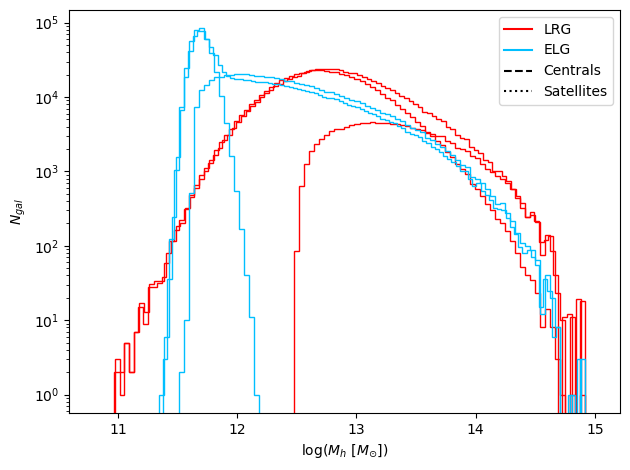

In [10]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


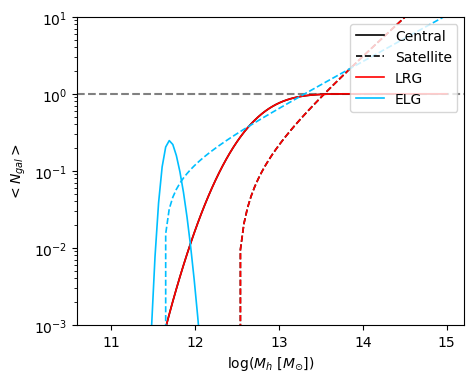

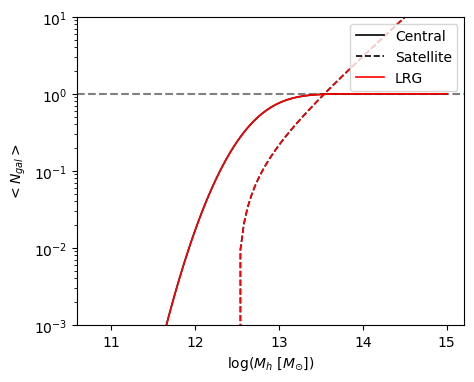

In [11]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [12]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [13]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Compute wp for ELG...


Done in 1.758 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 0.963 s


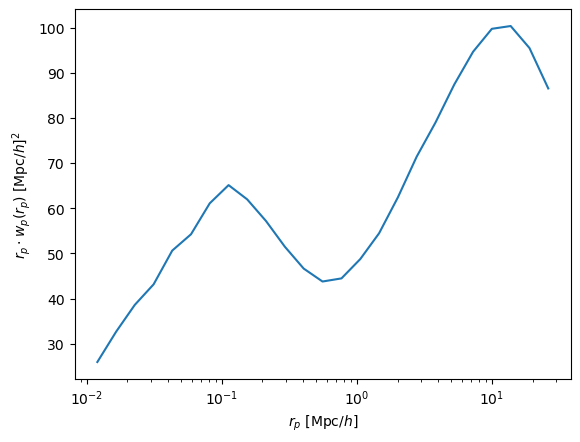

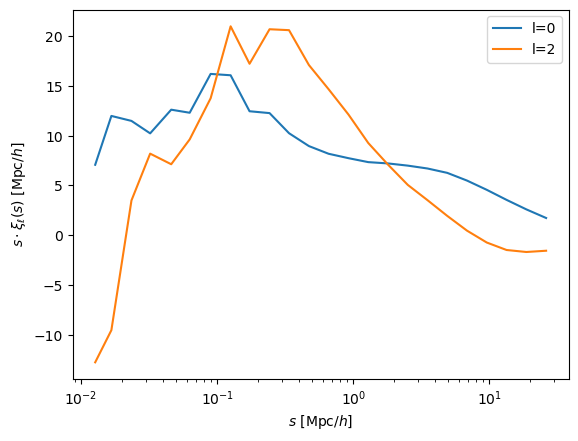

In [14]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [15]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG', verbose=False) for ii in np.random.randint(0,2**32, size=10)]


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


#Compute wp for ELG...


Done in 0.453 s
#Compute wp for ELG...
Done in 0.493 s
#Compute wp for ELG...
Done in 0.491 s
#Compute wp for ELG...
Done in 0.504 s
#Compute wp for ELG...
Done in 0.447 s
#Compute wp for ELG...
Done in 0.448 s
#Compute wp for ELG...
Done in 0.459 s
#Compute wp for ELG...
Done in 0.478 s
#Compute wp for ELG...
Done in 0.489 s
#Compute wp for ELG...
Done in 0.441 s


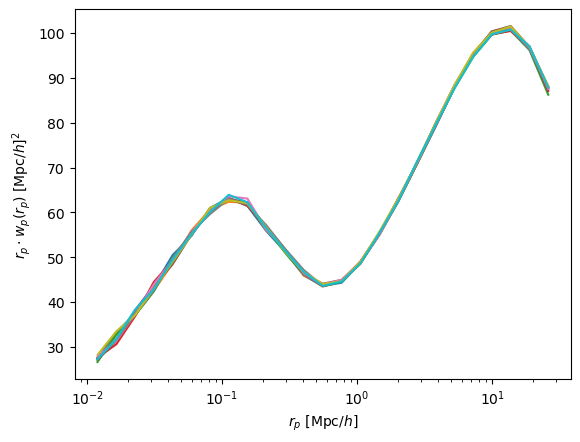

#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.434 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.506 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 2.750 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.420 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.417 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.427 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.426 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.486 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.425 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.417 s


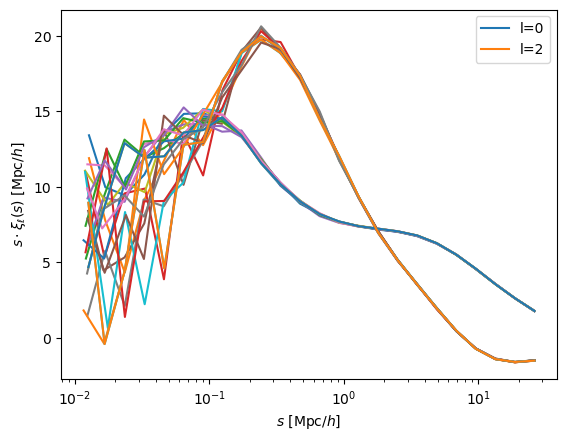

In [16]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

# Use particles for satelittes instead of NFW

In [25]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['Abacus']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 with particles...


FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950/halo_rv_A/halo_rv_A_000.asdf'

In [19]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles
cats = HOD_obj_part.make_mock_cat('LRG',fix_seed=None) 
cats 

Create mock catalog for ['LRG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 0.4523293972015381
Start satellite assignement
Satellite assignement done 0.12204289436340332
LRG mock catalogue done 0.20776724815368652
562175 central galaxies, 137659 satellites, fraction of satellite 0.20 
Done overall time  LRG 1.0907583236694336


Catalog(csize=699834, size=699834, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [26]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None)
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 0.46883153915405273
Start satellite assignement
Satellite assignement done 0.11684036254882812
LRG mock catalogue done 0.21812963485717773
561983 central galaxies, 138002 satellites, fraction of satellite 0.20 
Done overall time  LRG 1.1339664459228516
Run HOD for ELG
No density set
HOD Computed 1.0575635433197021
Start satellite assignement
Satellite assignement done 0.9093410968780518
ELG mock catalogue done 1.2004640102386475
836217 central galaxies, 1282423 satellites, fraction of satellite 0.61 
Done overall time  ELG 3.2299184799194336


Catalog(csize=2818625, size=2818625, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

#Compute wp for ELG...


Done in 0.397 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.371 s


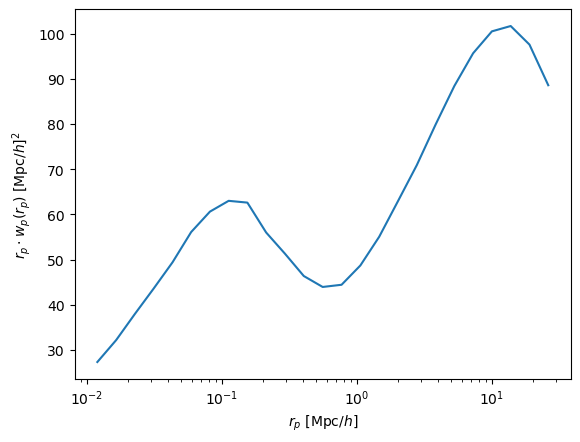

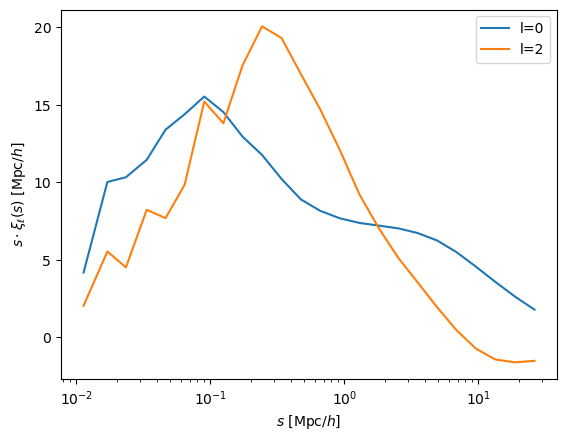

In [22]:
#compute clustering for 1 tracer, it applies rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [23]:
cross_corr = HOD_obj_part.get_crosswp(cats, tracers=['ELG', 'LRG'], verbose=True)

#Compute wp for ['ELG' 'ELG']...
#Done in 0.824 s
#Compute wp for ['ELG' 'LRG']...
#Done in 0.505 s
#Compute wp for ['LRG' 'LRG']...
#Done in 0.319 s


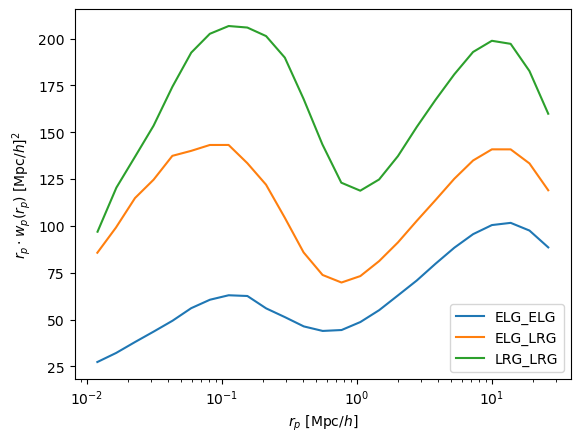

In [24]:
for tr, (rp, wp) in zip(cross_corr.keys(), cross_corr.values()):
    plt.plot(rp,rp*wp, label=tr)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()